In [1]:
# unsuperwised learning
# day 1
# Kmeans Clustering using iris datasets
from sklearn.datasets import load_iris
# loading the model 
from sklearn.cluster import KMeans

In [2]:
x = load_iris()
print(x.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
samples = x.data
print(samples[:3,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [4]:
# fitting the mode
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)

KMeans(n_clusters=3)

In [8]:
labels = kmeans.predict(samples)

In [9]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [11]:
test_sample =[[ 5.7 ,4.4, 1.5, 0.4],
              [ 6.5 ,3. ,5.5 ,1.8],
              [ 5.8 ,2.7, 5.1, 1.9]]

In [12]:
labels_test = kmeans.predict(test_sample)

In [13]:
print(labels_test)

[1 2 0]


In [15]:
# ploting the scatter plot
import matplotlib.pyplot as plt
print(x.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


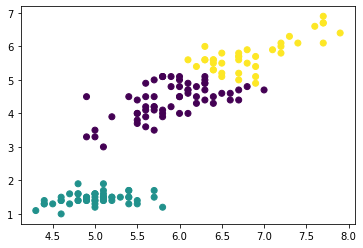

In [18]:
# plot against sepal length to petal length
sl = x.data[:,0]
pl = x.data[:,2]
sw = x.data[:,1]
pw = x.data[:,3]
plt.scatter(sl,pl,c = labels)
plt.show()

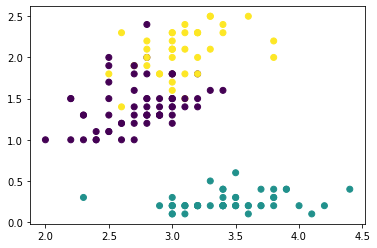

In [19]:
plt.scatter(sw,pw,c=labels)

In [20]:
# finding the cerntroids
center = kmeans.cluster_centers_

In [21]:
center

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

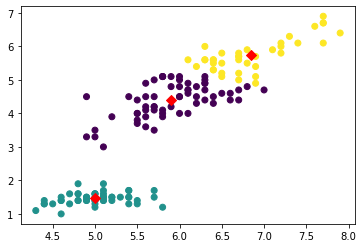

In [36]:
sl = x.data[:,0]
pl = x.data[:,2]
c_1 = center[:,0]
c_2 = center[:,2]
plt.scatter(sl,pl,c = labels)
plt.scatter(c_1,c_2, marker ='D',c='r', s =50)
plt.show()

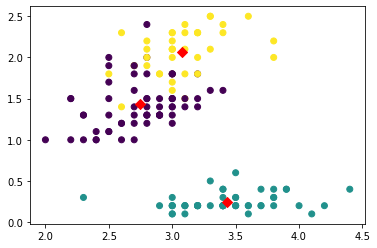

In [37]:
# centrid for the sepal width and petal width
sw = x.data[:,1]
pw = x.data[:,3]
c_3 = center[:,1]
c_4 = center[:,3]
plt.scatter(sw,pw,c=labels)
plt.scatter(c_3,c_4, marker ='D',c='r', s =50)

### measuring the quality of the kmeans via inertia
inertia measures how the clusters are spread out,by analysing the distance from each point in the cluster to it's centroid. kmeans try to minimize the inertia >
model.inertia_
Increasing the amount of clusters will reduce the inertia
An optimal clustering should have lower inertia and not too many clusters 


In [5]:
print(kmeans.inertia_)

78.851441426146


Text(0, 0.5, 'inertia')

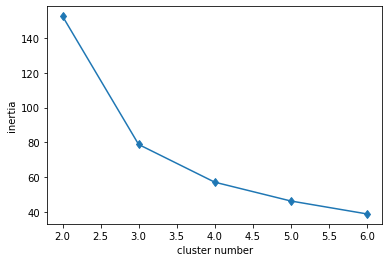

In [10]:
# creating a inertia curve
import matplotlib.pyplot as plt
l_in = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(samples)
    l_in.append(kmeans.inertia_)
plt.plot(range(2,7), l_in, '-d')
plt.xlabel('cluster number')
plt.ylabel('inertia')


Note: in kmeans clustering the varience of a feature has higher influence on the algorithm so that scaling the features is an important factor  
standard scaling  mean 0 varience 1

In [23]:
# creating pipeline for standardization
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import pandas as pd


In [18]:
wine = load_wine()
print(wine.keys())
print(wine.feature_names)
samples = wine.data
print(wine.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [19]:
# initailizing the model and scalar
kmeans = KMeans(n_clusters= 3)
scaler = StandardScaler()

In [20]:
# creating the pipeline
pipeline = make_pipeline(scaler,kmeans)

In [21]:
tar = wine.target

In [22]:
pipeline.fit(samples)
labels = pipeline.predict(samples)

In [24]:
df = pd.DataFrame({'labels':labels, 'tar': tar})

In [25]:
ctab = pd.crosstab(df['labels'], df['tar'])

In [26]:
ctab

tar,0,1,2
labels,,,
0,0,65,0
1,0,3,48
2,59,3,0


Note: StandardScaler applied to each feature 
and Noramlization applied to each samples

In [27]:
from sklearn.preprocessing import Normalizer

In [29]:
norm = Normalizer()
pipe = make_pipeline(norm, kmeans)
pipe.fit(samples)
labels = pipe.predict(samples)
df = pd.DataFrame({'labels':labels, 'tar': tar})
ctab = pd.crosstab(df['labels'], df['tar'])
print(ctab) # does not lead to better results


tar      0   1   2
labels            
0        0  33   4
1       51   5   4
2        8  33  40


### hierarchical clustering and visualizations


Hierarchical clustering allows us to group the nodes based on the similarity 
the basic method to group the clusters is by the distance between the samples
As height increases the cluster groups are joined together and finally all the cluster forms a big cluster<br>
* linkage function dettermines the way of measuring the distance between the clusters

    Two types of linkage
    * complete > The distance is measured as the distance b/w the furthest points in the clusters
    * single > The distance between the closest points b/w the points in the clusters


In [67]:
# day 3 26/02/21
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('eurovision.csv')
print(df.shape)

(1066, 11)


In [41]:
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


In [44]:
df.dropna(inplace=True) # droping the na values
#  resetting the index after droping
df.reset_index(inplace=True, drop=True)

In [45]:
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
1,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
2,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
3,Albania,Australia,1,1,2,1,3,1,1,12.0,12.0
4,Albania,Russia,7,4,7,5,7,4,4,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
219,United Kingdom,Bulgaria,10,4,21,3,9,6,3,5.0,8.0
220,United Kingdom,Australia,3,6,6,4,12,3,5,8.0,6.0
221,United Kingdom,Cyprus,1,7,2,11,16,4,9,7.0,2.0
222,United Kingdom,Lithuania,7,8,13,19,3,7,1,4.0,12.0


In [70]:
samples = df.iloc[:24,2:8]
contries = list(df['To country'][:24].values)
print(samples.shape, len(contries))

(24, 6) 24


In [71]:
samples

,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank
0,8,13,9,14,9,10
1,4,10,3,7,2,3
2,11,3,6,13,6,7
3,1,1,2,1,3,1
4,7,4,7,5,7,4
5,1,1,1,1,1,1
6,10,3,4,3,5,5
7,5,17,7,7,16,9
8,3,5,3,4,3,3
9,2,2,2,2,2,2


In [72]:
link = linkage(samples, method = 'complete')

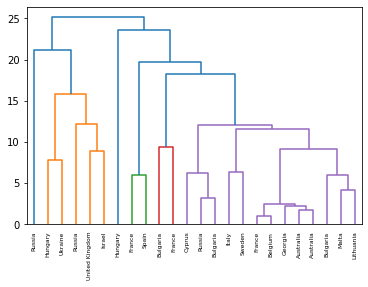

In [73]:
dendrogram(link, labels=contries, leaf_rotation= 90, leaf_font_size=6)
plt.show()

 extracting cluster label any any stage can be done by using fcluster function<br>
    cluster label can be extrated based on different methods one of which is by specifying the height in the dendrogram
    Draw a line horizondally in the dendrogram, the clusters which are formed at that distace will be returned
    


In [75]:
# link contains the linkages
from scipy.cluster.hierarchy import fcluster
labels = fcluster(link, 15, criterion='distance')

In [76]:
labels

array([1, 6, 5, 6, 6, 6, 6, 2, 6, 6, 6, 6, 4, 6, 4, 1, 2, 6, 5, 6, 3, 7,
       2, 6], dtype=int32)

In [77]:
# creating the dataframe for crosstabulation]
crt = pd.DataFrame({'labels': labels, 'country': contries})

In [80]:
tab = pd.crosstab(crt['labels'],crt['country'])

In [81]:
tab

country,Australia,Belgium,Bulgaria,Cyprus,France,Georgia,Hungary,Israel,Italy,Lithuania,Malta,Russia,Spain,Sweden,Ukraine,United Kingdom
labels,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6,2,1,2,1,1,1,0,0,1,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1]:
# creating t-SNE for visualization(unsuperwiesd)

### t-SNE
 is mostly used to understand high-dimensional data and project it into low-dimensional space (like 2D or 3D). That makes it extremely useful when dealing with CNN networks.
 * also used in dimentioalty reduction<br>
<p>
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [4]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
samples = iris.data
labels = iris.target
print(samples.shape)
print(labels.shape)

(150, 4)
(150,)


In [13]:
# creating the model using TSNE
model = TSNE(learning_rate=50)
trf = model.fit_transform(samples)

In [14]:
print(trf.shape)

(150, 2)


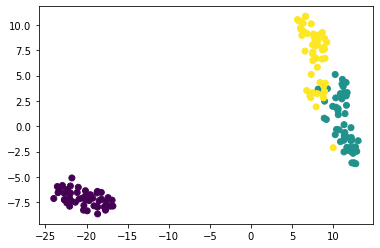

In [15]:
# creating the scatter plot
plt.scatter(trf[:,0], trf[:,1], c = labels)

In [17]:
# NOTE t-SNE provides great visualizations when the individual samples can be labeled.

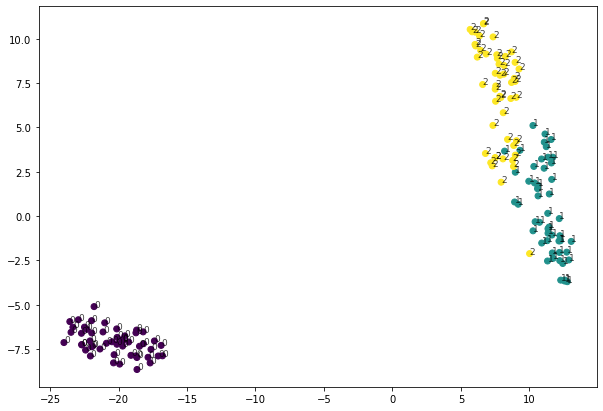

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(trf[:,0], trf[:,1], c = labels)
for i, j, k in zip(trf[:,0], trf[:,1], labels ):
    plt.annotate(k, (i, j), fontsize=9, alpha=0.75)
plt.show()

### Dimentionality Reduction

### PCA
Principle component analysis
PCA is the fundamental reduction technique.<br>
TWO STEPS
    * Decorrelatation
    * Reduce Dimension

In [1]:
# calculating the correlation between data using pearsonr in scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0, 0.5, 'petal length (cm)')

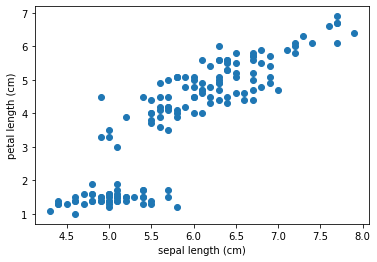

In [5]:
iris = load_iris()
print(iris.feature_names)
xs = iris.data[:,0]
ys = iris.data[:,2]
plt.scatter(xs,ys)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

In [6]:
# calculating the correaltion
corr, pvalue = pearsonr(xs, ys)

In [7]:
print(corr,pvalue)

0.8717537758865832 1.0386674194497525e-47


In [8]:
# Decorralting the data using PCA

In [9]:
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [10]:
model = PCA()

In [12]:
# transorming the data and converting to pca features
pca_f = model.fit_transform(iris.data)

In [13]:
pca_f.shape

(150, 4)

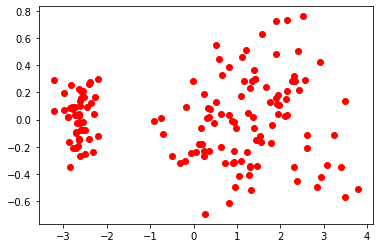

In [14]:
# taking previously correlated data and plotting 
xs = pca_f[:,0]
ys = pca_f[:,2]
plt.scatter(xs, ys, c = 'red')

In [15]:
# calculating the correlation of transformed data
corr, pval = pearsonr(xs,ys)

In [16]:
print(corr, pval)

1.1362438767648086e-16 0.999999999999989


In [17]:
# correlatioon becomes very less

#### Using PCA for reducing dimension > finding the intrinsic dimensions
PCA features with high variences  

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [3]:
iris = load_iris().data
print(iris.shape)

(150, 4)


In [4]:
model = PCA()
model.fit(iris)

PCA()

In [6]:
# mean of the model
model.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

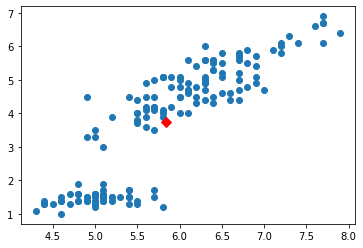

In [9]:
plt.scatter(iris[:,0],iris[:,2])
plt.scatter(model.mean_[0],model.mean_[2], marker ='D',c='r', s =50)

In [10]:
com = model.components_

In [11]:
com

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [14]:
print(model.n_components_)

4


In [15]:
model.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

Text(0, 0.5, 'variance')

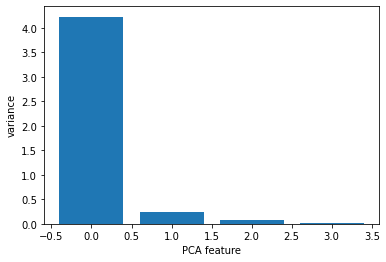

In [17]:
x = range(4)
y = model.explained_variance_
plt.bar(x,y)
plt.xlabel('PCA feature')
plt.ylabel('variance')
# plt.xticks(load_iris().feature_names)

In [19]:
# here only the first 2 are informative features so that the data can be reduced into 2 dimensions
red_model = PCA(n_components=2)
trans = red_model.fit_transform(load_iris().data)
print(trans.shape)

(150, 2)


### NMF(Non-negative Matrix Factorization)


In [51]:
# image pattern identification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [2]:
lcd = pd.read_csv('lcd-digits.csv')

In [3]:
lcd.shape

(99, 104)

In [4]:
lcd.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
lcd.tail()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.82,0.0.83,0.0.84,0.0.85,0.0.86,0.0.87,0.0.88,0.0.89,0.0.90,0.0.91
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
d = lcd.iloc[0].values
print(type(d))

<class 'numpy.ndarray'>


In [22]:
d.shape

(104,)

In [24]:
d = d.reshape(-1,1)

In [25]:
d.shape

(104, 1)

In [27]:
d = d.reshape(13,8)

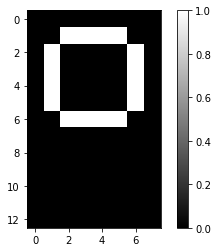

In [35]:
plt.imshow(d, cmap='gray', interpolation='nearest')
plt.colorbar()
# plt.colormaps()

In [37]:
def show(digits):
    d = digits.reshape(13,8)
    plt.imshow(d, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [39]:
# using NMF to decompose
s = lcd.values

In [42]:
print(s.shape, type(s))

(99, 104) <class 'numpy.ndarray'>


In [43]:
nmf = NMF(n_components=7)
ft = nmf.fit_transform(s)

In [48]:
ft.shape

(99, 7)

In [47]:
nmf.components_.shape

(7, 104)

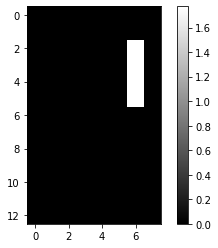

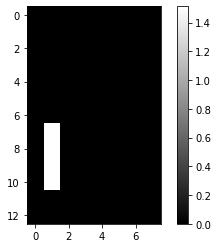

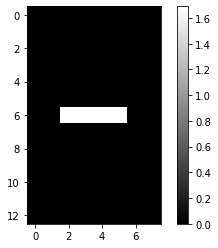

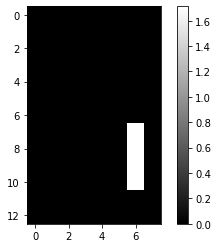

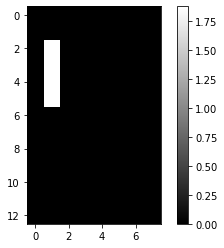

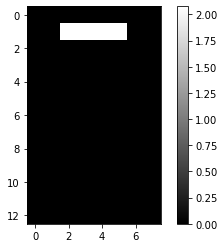

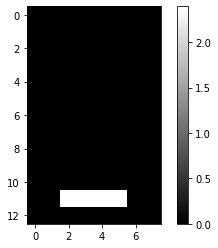

In [50]:
# plotting each components
for com in nmf.components_:
    show(com)

In [52]:
# resconstructing
re = np.dot(ft,nmf.components_)

In [53]:
re.shape

(99, 104)

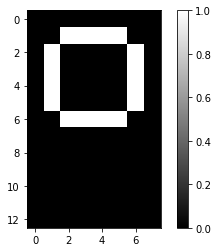

In [54]:
show(re[0,:])

In [ ]:
# nmf can be also used to find similarties such as similarity b/w documents
# documents with similar nmf_feature values are of similar , we can measure it by using the cosine similarity after 
# normalizing the nmf_feature values
